<h1>Project 1 on Machine Learning, deadline October 7 (midnight), 2024</h1>

<h2>Franke function</h2>

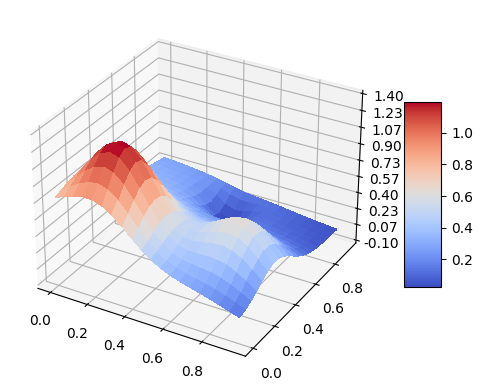

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<h2>Part a) : Ordinary Least Square (OLS) on the Franke function</h2>

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate data.
n = 50
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xm, ym = np.meshgrid(x,y)

def FrankeFunction(x, y, noisefactor=0.0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noisefactor*np.random.randn(x.shape[0], y.shape[1])

z = FrankeFunction(xm, ym)

x_flat = xm.flatten().reshape(-1, 1)
y_flat = ym.flatten().reshape(-1, 1)
z_flat = z.flatten().reshape(-1, 1)

#create a 5 degree poylnomial model for plotting
degree = 5
# def create_design_matrix(x, y, degree):
#     polydegs = sum(i for i in range(1, degree + 2)) # Number of combinations in polynomial
    
#     X = np.ones((len(x), polydegs))
#     column = 0
#     for i in range(degree + 1):
#         for j in range(degree + 1 - i):
#             # Create design matrix with columns 1, x, y, x^2, xy, y^2, x^3, x^2y, xy^2, y^3, ...
#             input = (x**i * y**j)
#             X[:,column] = input
#             column += 1
#     return X

def create_design_matrix(x: np.ndarray, y: np.ndarray, degree: int):
    """
    Creates the design matrix X.

    Parameters:
    x (np.ndarray): The independent variable(s).
    y (np.ndarray): The independent variable(s).
    degree (int): The degree of the polynomial features.

    Returns:
    np.ndarray: The design matrix X.
    """
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N_x = len(x); N_y = len(y)
    l = int((degree+1)*(degree+2)/2)
    X = np.ones((int(N_x*N_y), l))
    
    xx, yy = np.meshgrid(x, y)          # Make a meshgrid to get all possible combinations of x and y values
    xx = xx.flatten()
    yy = yy.flatten()

    idx = 1
    for i in range(1, degree+1):
        for j in range(i+1):
            X[:, idx] = xx**(i-j)*yy**j
            idx += 1

    return X


X = create_design_matrix(x, y, degree)

# Split the data
X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=0)

#Calculate MSE and R2 for both scaled and unscaled data

#start with unscaled data | standardscaling(-= mean)
X_train_scaled = X_train.copy()
X_train_scaled[:,1:] = X_train[:,1:] - np.mean(X_train[:,1:], axis=0)

# OLS regression
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print('5 degree polynomial model')
print(f"MSE standardscaled: {mse:.4f}")
print(f"R2 standardscaled: {r2:.4f}")

#compare with minmaxscaling
X_train_scaled = X_train.copy()
X_train_max = np.max(X_train[:,1:])
X_train_min = np.min(X_train[:,1:])

X_train_scaled[:,1:] = (X_train[:,1:] - X_train_min) / (X_train_max - X_train_min)

# OLS regression
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print(f"MSE minmaxscaled: {mse:.4f}")
print(f"R2 minmaxscaled: {r2:.4f}")


# OLS regression
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print(f"MSE unscaled: {mse:.4f}")
print(f"R2 unscaled: {r2:.4f}")




5 degree polynomial model
MSE standardscaled: 0.0060
R2 standardscaled: 0.9271
MSE minmaxscaled: 0.0022
R2 minmaxscaled: 0.9737
MSE unscaled: 0.0022
R2 unscaled: 0.9737


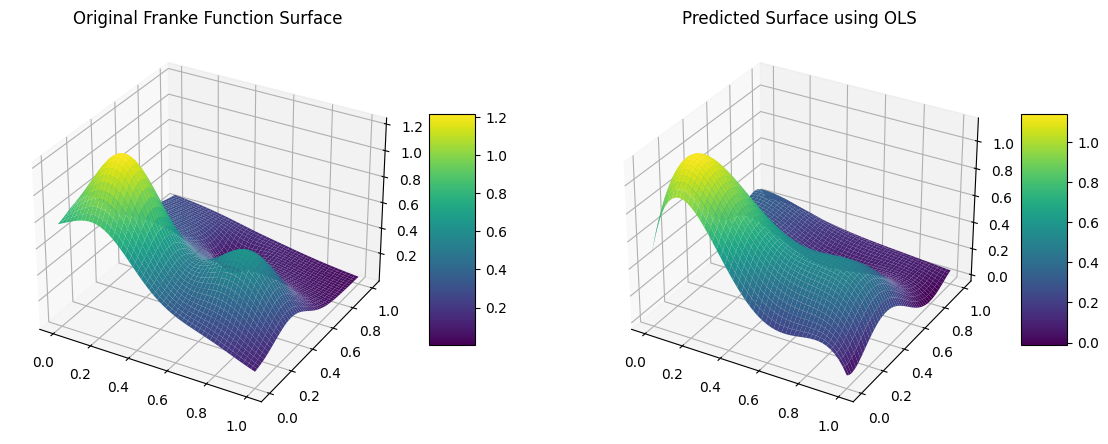

In [24]:
'''Since there was no significant difference between scaled and unscaled data, I will plot with unscaled data'''
# import ipywidgets as widgets

%matplotlib inline

fig = plt.figure(figsize=(14, 6))
# Original surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(xm, ym, z, cmap='viridis')
ax1.set_title("Original Franke Function Surface")
fig.colorbar(surf1, shrink=0.5, aspect=5)

# Predicted surface
z_model = z_model.reshape(n, n)

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xm, ym, z_model, cmap='viridis')
ax2.set_title("Predicted Surface using OLS")
fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()


50 50
50 50
50 50
50 50
50 50
Best MSE: 0.0020 at degree: 5
Best R2: 0.9762 at degree: 5


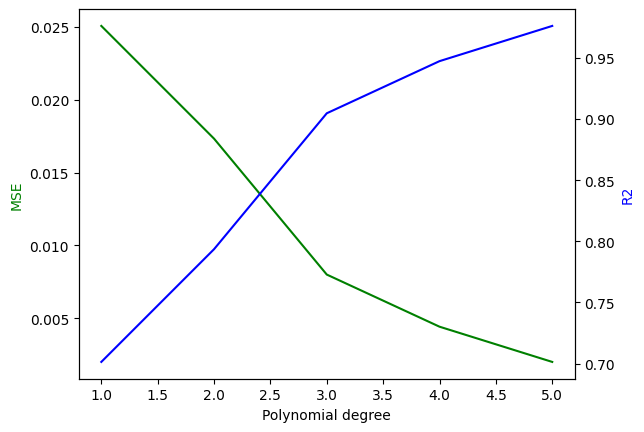

<function matplotlib.pyplot.show(close=None, block=None)>

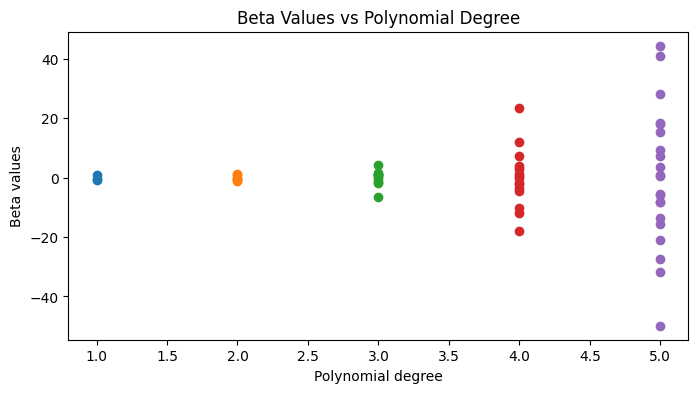

In [25]:
#Calculate and plot MSE and R2 score as a function of the polynomial degree, Also plot the beta values


maxdegree = 5
degrees = np.arange(1, maxdegree+1)
mse = []
r2 = []
beta_values = []
BestVals = {}


for d in degrees:
    # Create design matrix for each degree
    X = create_design_matrix(x, y, d)

    # Split the data
    X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)

    # Scale
    X_train_scaled = X_train.copy()
    X_train_scaled[:,1:] = X_train[:,1:] - np.mean(X_train[:,1:], axis=0)


    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred = X_test @ beta

    mse.append(mean_squared_error(z_test, z_pred))

    r2.append(r2_score(z_test, z_pred))

    beta_values.append(beta)


#print best mse and r2
print(f"Best MSE: {np.min(mse):.4f} at degree: {degrees[np.argmin(mse)]}")
print(f"Best R2: {np.max(r2):.4f} at degree: {degrees[np.argmax(r2)]}")
BestVals['MSE OLS'] = np.min(mse)
BestVals['R2 OLS'] = np.max(r2)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(degrees, mse, 'g-')
ax2.plot(degrees, r2, 'b-')
ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.show()



fig = plt.figure(figsize=(8, 4))
for i, betas in enumerate(beta_values):
    plt.scatter([degrees[i]] * len(betas), betas, label=f'Degree {degrees[i]}')
plt.xlabel(r'Polynomial degree')
plt.ylabel(r'Beta values')
plt.title('Beta Values vs Polynomial Degree')
plt.show




Note for us:
Larger polynomial degrees -> larger beta values

<h2>Part b): Adding Ridge regression for the Franke function
</h2>

50 50
Best MSE: 0.0024 at lambda: 0.0001
Best R2: 0.9714 at lambda: 0.0001


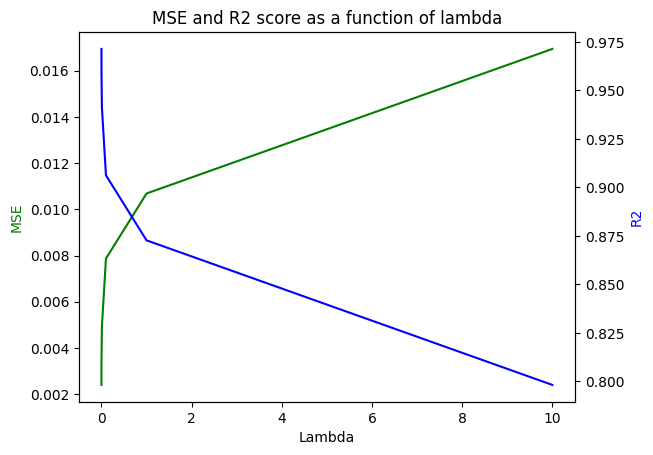

1 21
1 21
1 21
1 21
1 21
1 21


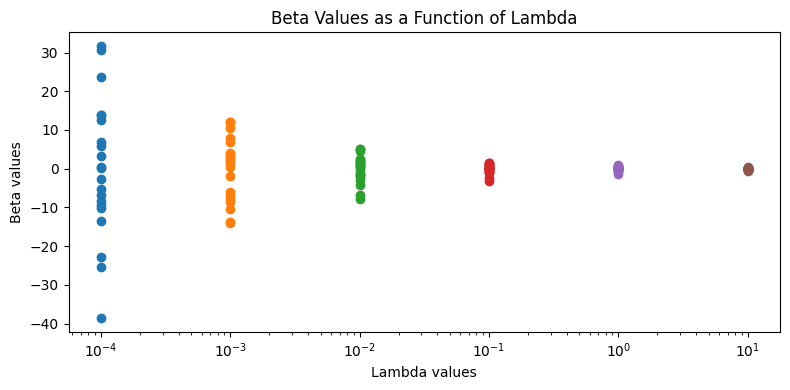

In [34]:
"""Whole process with Ridge regression on a 5 degree polynomial model with varying lambda values"""
from sklearn.linear_model import Ridge

poly_deg = 5
X = create_design_matrix(x, y, poly_deg)

# Split the data
X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)

# Minmax scaling
X_train_scaled = X_train.copy()
X_train_scaled[:,1:] = X_train[:,1:] - np.mean(X_train[:,1:], axis=0)
X_test_scaled = X_test.copy()
X_test_scaled[:,1:] = X_test[:,1:] - np.mean(X_test[:,1:], axis=0)



lambda_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

mse = []
r2 = []
beta_values = []


for l in lambda_values:
    ridge = Ridge(alpha=l, fit_intercept=False)
    ridge.fit(X_train_scaled, z_train)
    z_pred = ridge.predict(X_test_scaled)

    mse.append(mean_squared_error(z_test, z_pred))
    r2.append(r2_score(z_test, z_pred))
    beta_values.append(ridge.coef_)


#print best mse and r2
print(f"Best MSE: {np.min(mse):.4f} at lambda: {lambda_values[np.argmin(mse)]}")
print(f"Best R2: {np.max(r2):.4f} at lambda: {lambda_values[np.argmax(r2)]}")
BestVals['MSE Ridge'] = np.min(mse)
BestVals['R2 Ridge'] = np.max(r2)
BestVals['Lambda Ridge'] = lambda_values[np.argmin(mse)]


# Plot MSE and R2 score as a function of lambda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_values, mse, 'g-')
ax2.plot(lambda_values, r2, 'b-')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
# plt.xscale('log')
plt.title('MSE and R2 score as a function of lambda')
plt.show()

fig = plt.figure(figsize=(8, 4))
for i, betas in enumerate(beta_values):

    xscat = [lambda_values[i]] * len(betas)
    yscat = betas
    plt.scatter([xscat for scat in range(len(yscat[0]))],yscat[0], label=f'Lambda {lambda_values[i]}')
plt.xlabel(r'Lambda values')
plt.ylabel(r'Beta values')
plt.title('Beta Values as a Function of Lambda')
plt.xscale('log')
plt.tight_layout()
plt.show()



Note for us: Larger lambda values -> smaller beta values 

<h2>Part c) Adding Lasso for the Franke function</h2>

/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.619e-02, tolerance: 1.633e-02
  model = cd_fast.enet_coordinate_descent(


Best MSE: 0.0044 at lambda: 1e-05
Best R2: 0.9472 at lambda: 1e-05


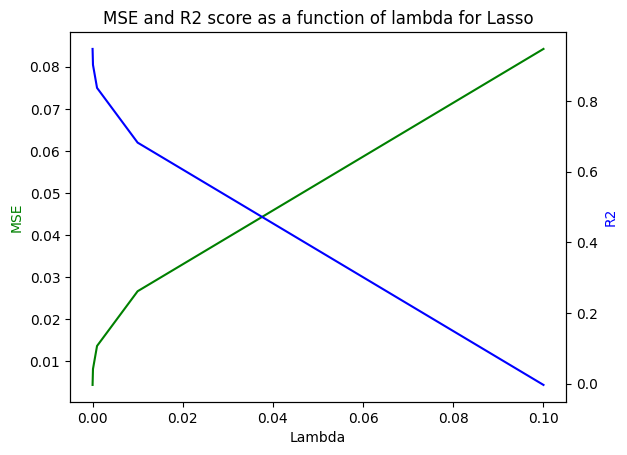

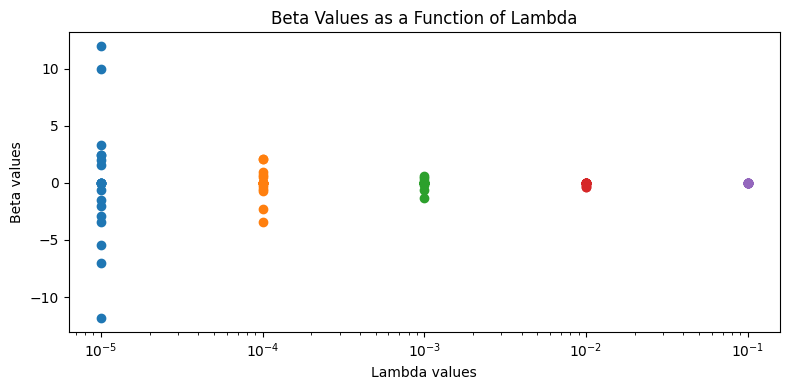

In [41]:
from sklearn.linear_model import Lasso

# Define the lambda values for Lasso regression
lambda_values = [1e-5,1e-4, 1e-3, 1e-2, 1e-1]
mse_lasso = []
r2_lasso = []
beta_values_lasso = []


# Create a Lasso model for each lambda value
for l in lambda_values:
    lasso = Lasso(alpha=l , max_iter=int(1e5), tol = 1e-4)
    lasso.fit(X_train_scaled, z_train)
    z_pred_lasso = lasso.predict(X_test_scaled)

    mse_lasso.append(mean_squared_error(z_test, z_pred_lasso))
    r2_lasso.append(r2_score(z_test, z_pred_lasso))
    beta_values_lasso.append(lasso.coef_)

# Print best MSE and R2 for Lasso
print(f"Best MSE: {np.min(mse_lasso):.4f} at lambda: {lambda_values[np.argmin(mse_lasso)]}")
print(f"Best R2: {np.max(r2_lasso):.4f} at lambda: {lambda_values[np.argmax(r2_lasso)]}")
BestVals['MSE Lasso'] = np.min(mse_lasso)
BestVals['R2 Lasso'] = np.max(r2_lasso)
BestVals['Lambda Lasso'] = lambda_values[np.argmax(r2_lasso)]


# Plot MSE and R2 score as a function of lambda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_values, mse_lasso, 'g-')
ax2.plot(lambda_values, r2_lasso, 'b-')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.title('MSE and R2 score as a function of lambda for Lasso')
plt.show()



fig = plt.figure(figsize=(8, 4))
for i, betas in enumerate(beta_values_lasso):

    xscat = [lambda_values[i]] * len(betas)
    yscat = betas
    plt.scatter(xscat,yscat, label=f'Lambda {lambda_values[i]}')
plt.xlabel(r'Lambda values')
plt.ylabel(r'Beta values')
plt.title('Beta Values as a Function of Lambda')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [42]:
#print best mse and r2 as columns in a dataframe
for i in BestVals:
    print(i, f'{BestVals[i]:.5f}')


MSE OLS 0.00200
R2 OLS 0.97617
MSE Ridge 0.00240
R2 Ridge 0.97140
Lambda Ridge 0.00010
MSE Lasso 0.00443
R2 Lasso 0.94724
Lambda Lasso 0.00001


I found the best model to be the Ridge regression with $λ = 0.0001$

<h2>Part d): Paper and pencil part</h2>



There exists a continuous function $f(\mathbf{x})$ and a normal distributed error $\mathbf{\epsilon} \sim N(0,\sigma^2)$ which describes our data $\mathbf{y} = f(\mathbf{x}) + \epsilon$. We approximate the function $f$ with our model $\mathbf{\tilde{y}}= \mathbf{X\beta}$, minimized by $(\mathbf{y} - \mathbf{\tilde{y}})^2$.

Show that the expectation value of $\mathbf{y}$ for a given element in $i$:
$$\mathbb{E}(y_i) = \sum_j x_{ij}\beta_j=\mathbf{X}_{i,*}\mathbf{\beta}$$ 
and its variance is:
$$\text{Var}(y_i) = \sigma^2$$


Given $\mathbf{y} = f(\mathbf{x}) + \epsilon$ and $ \epsilon \sim N(0, \sigma^2) $

Expectation value:
$$\mathbb{E} (\mathbf{y}) = \mathbb{E}(f(\mathbf{x}) + ϵ ) = \mathbb{E}(f(\mathbf{x})) $$
Since $\mathbb{E}(\epsilon) = 0$, because we assume $\epsilon$ to be normally distributed with a mean value of 0, and a variance of $\sigma^2$.

We need to keep in mind our model for $\mathbf{y}$ is $\mathbf{\tilde{y}}= \mathbf{X\beta}$

From there we can look at it element-wise:
$$\mathbb{E}(y_i) =  \sum_j x_{ij} β_j  = \mathbf{X}_{i,*}\mathbf{\beta}$$


Variance:
The variance lies in the normal distributed error $\mathbf{\epsilon} \sim N(0,\sigma^2)$. 
For each point in $\mathbf{y}$ the variance   $\text{Var}(y_i) =\sigma^2$. 
And therefor $y_i ∼ N(\mathbf{X}_{i,*}\mathbf{\beta},\sigma^2)$ 
with the mean value $\mathbf{X}_{i,*}\mathbf{\beta}$ and variance $\sigma^2$




Show that $\mathbb{E}(\mathbf{\hat{\beta}}) = \mathbf{\beta}$ using the (OLS) expression for the optimal parameters $\mathbf{\hat{\beta}}$, 
$$\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

Then we need the expression for $\mathbf{y}$, $\mathbf{y} = \mathbf{X\beta} + \mathbf{\epsilon}$ and we can substitute into the OLS expression:
$$ \mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{X\beta} + \mathbf{\epsilon}) $$
$$ = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T\mathbf{X}β + \mathbf{X}^T\mathbf{\epsilon} )$$
$$ = \mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}$$

Then we can find the expectation value:
$$\mathbb{E}(\mathbf{\hat{\beta}})   = \mathbb{E}(\mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon})$$
$$ = \mathbb{E} ( \mathbf{\beta}) + \mathbb{E} ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}) = \mathbf{\beta}$$
This is because  $\mathbb{E} ( \mathbf{\beta}) = \mathbf{\beta}$ and $ \mathbb{E} ( \epsilon) = 0$

Thus, we have shown that: $ \mathbb{E}(\mathbf{\hat{\beta}}) = \mathbf{\beta} $





To show that $\text{Var}(\mathbf{\hat{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}$, we can start the same way as before:

$$ \mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{X\beta} + \mathbf{\epsilon}) $$
$$ = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T\mathbf{X}β + \mathbf{X}^T\mathbf{\epsilon} )$$
$$ = \mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}$$

Since $\mathbf{\beta}$ is a constant vector, its variance is zero: $ \text{Var}(\mathbf{\beta}) = 0 $

Variance of linear transformation: $\text{Var}(\mathbf{A\epsilon}) = \mathbf{A}\text{Var}(\mathbf{\epsilon})\mathbf{A^T}$.

Set $\mathbf{A} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T$:
$$\text{Var}(\mathbf{A\epsilon}) = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \text{Var}(\epsilon) ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T)^T$$
$\text{Var}(\epsilon) = \sigma^2$.
$$= (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T  ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T)^T \sigma^2$$
$$=  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}   \sigma^2$$
$$ = (\mathbf{X}^T\mathbf{X})^{-1}\sigma^2$$

<h2>Part e): Bias-variance trade-off and resampling techniques</h2>

Polynomial degree: 0
Error: 0.0915687088375443
Bias^2: 0.09132045409679515
Variance: 0.00024825474074913277
Polynomial degree: 1
Error: 0.03301201513847214
Bias^2: 0.03273127689863437
Variance: 0.000280738239837768
Polynomial degree: 2
Error: 0.02756858411145183
Bias^2: 0.02716367258124624
Variance: 0.0004049115302055871
Polynomial degree: 3
Error: 0.019281309084828405
Bias^2: 0.01876640379041385
Variance: 0.0005149052944145553
Polynomial degree: 4
Error: 0.015344174158752418
Bias^2: 0.01473776133414837
Variance: 0.0006064128246040452
Polynomial degree: 5
Error: 0.012934149285075447
Bias^2: 0.012108332553432601
Variance: 0.0008258167316428442
Polynomial degree: 6
Error: 0.012411146545447673
Bias^2: 0.011399101047270226
Variance: 0.0010120454981774464
Polynomial degree: 7
Error: 0.012113828532773265
Bias^2: 0.01096697421325754
Variance: 0.001146854319515724
Polynomial degree: 8
Error: 0.012585753999435588
Bias^2: 0.010635247308828215
Variance: 0.0019505066906073717
Polynomial degree: 9


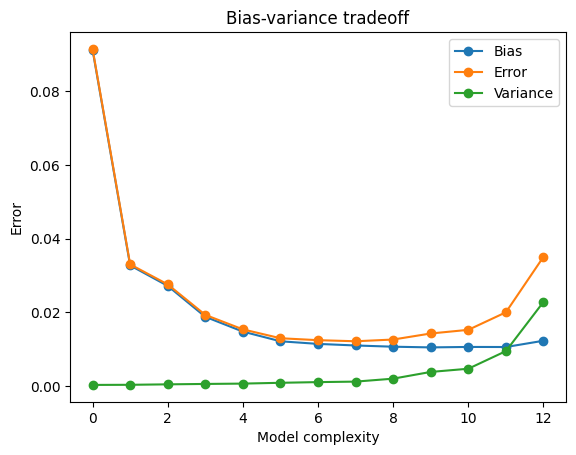

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso



# Number of bootstrap samples and max polynomial degree
n_boostraps = 200
maxdegree = 13

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

lam = 1e-4  

z = FrankeFunction(xm, ym, noisefactor=0.1)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()


x_train,x_test,y_train,y_test,z_train,z_test = train_test_split(x_flat,y_flat,z_flat,test_size=0.2)
X_train = np.c_[x_train, y_train]
X_test = np.c_[x_test, y_test]
batch_size = 400  # Batches help introduce randomness in the data, leading to better estimates for 

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    z_pred = np.zeros((z_test.shape[0], n_boostraps))

    mse = np.zeros(n_boostraps)

    for i in range(n_boostraps):
        X_, z_ = resample(X_train, z_train)
        indices = np.random.choice(len(X_train), size=batch_size, replace=True)
        X_batch = X_train[indices]
        z_batch = z_train[indices]
        
        z_pred[:, i] = model.fit(X_batch, z_batch).predict(X_test).ravel()


        mse[i] = mean_squared_error(z_test, z_pred[:, i]) 


    polydegree[degree] = degree
    error[degree] = np.mean(mse)  # Average MSE over bootstrap samples
    mean_prediction = np.mean(z_pred, axis=1)
    bias[degree] = np.mean((z_test - mean_prediction) ** 2)  # Calculate bias squared
    variance[degree] = np.mean(np.var(z_pred, axis=1))  # Calculate the average variance


    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Variance:', variance[degree])


plt.figure()
plt.plot(polydegree, bias,'-o', label='Bias')
plt.plot(polydegree, error, '-o',label='Error')
plt.plot(polydegree, variance, '-o',label='Variance')
plt.legend()
plt.xlabel('Model complexity')
plt.ylabel('Error')
plt.title('Bias-variance tradeoff')
plt.show()

bootstrap_mse_ols= np.min(error)




[0.09075042 0.09075042]
Degree: 0, Ridge Error: 0.0908, Bias^2: 0.0900, Variance: 0.0007
         Lasso Error: 0.0908, Bias^2: 0.0900, Variance: 0.0007
[0.03444447 0.03444447]
Degree: 1, Ridge Error: 0.0344, Bias^2: 0.0337, Variance: 0.0008
         Lasso Error: 0.0344, Bias^2: 0.0337, Variance: 0.0008
[0.02850065 0.02850065]
Degree: 2, Ridge Error: 0.0285, Bias^2: 0.0271, Variance: 0.0014
         Lasso Error: 0.0285, Bias^2: 0.0271, Variance: 0.0013
[0.01988442 0.01988442]
Degree: 3, Ridge Error: 0.0199, Bias^2: 0.0183, Variance: 0.0016
         Lasso Error: 0.0199, Bias^2: 0.0183, Variance: 0.0015
[0.01674695 0.01674695]
Degree: 4, Ridge Error: 0.0167, Bias^2: 0.0146, Variance: 0.0021
         Lasso Error: 0.0167, Bias^2: 0.0182, Variance: 0.0016
[0.01589538 0.01589538]
Degree: 5, Ridge Error: 0.0159, Bias^2: 0.0138, Variance: 0.0021
         Lasso Error: 0.0159, Bias^2: 0.0178, Variance: 0.0017
[0.0155563 0.0155563]
Degree: 6, Ridge Error: 0.0156, Bias^2: 0.0132, Variance: 0.0023
 

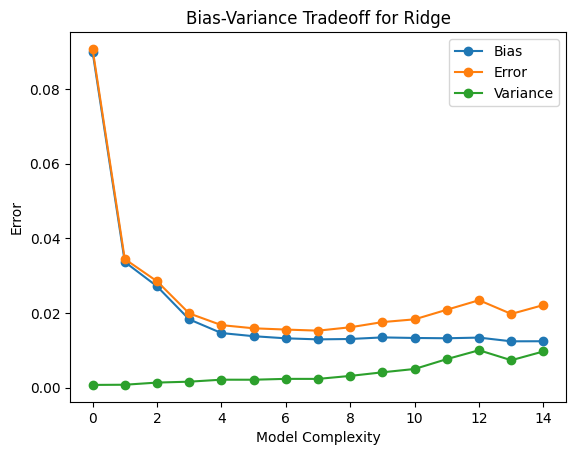

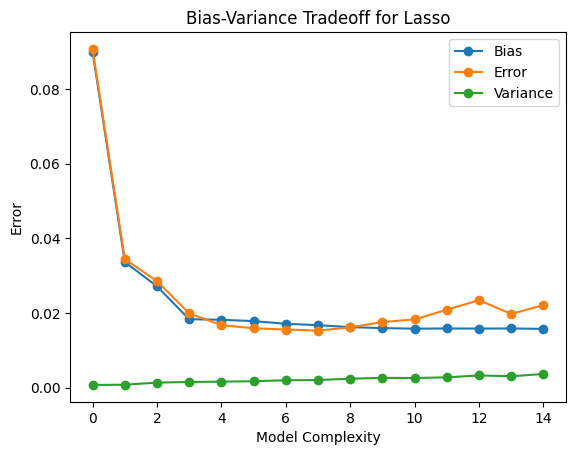

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Number of bootstrap samples and max polynomial degree
n_boostraps = 200
maxdegree = 15
batch_size = 150

lam_ridge = 1e-4
lam_lasso = 1e-5


errors = np.zeros((maxdegree, 2))
biases = np.zeros((maxdegree, 2))
variances = np.zeros((maxdegree, 2))

z = FrankeFunction(xm, ym, noisefactor=0.1)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()


x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2)
X_train = np.c_[x_train, y_train]
X_test = np.c_[x_test, y_test]

for degree in range(maxdegree):
    z_pred = np.zeros((z_test.shape[0], n_boostraps, 2))


    # Model_ols = LinearRegression(fit_intercept=False)
    Model_ridge = Ridge(alpha=lam_ridge)
    Model_lasso = Lasso(alpha=lam_lasso)

    poly = PolynomialFeatures(degree=degree)

    mse = np.zeros((n_boostraps, 2)) 

    for i in range(n_boostraps):
        X_, z_ = resample(X_train, z_train)
        indices = np.random.choice(len(X_train), size=batch_size, replace=True)
        X_batch = X_[indices]
        z_batch = z_[indices]

        # #OLS
        # z_pred[:, i, 0] = Model_ols.fit(poly.fit_transform(X_batch), z_batch).predict(poly.fit_transform(X_test))
        # mse[i, 0] = mean_squared_error(z_test, z_pred[:, i, 0])
        #Ridge
        z_pred[:, i, 0] = Model_ridge.fit(poly.fit_transform(X_batch), z_batch).predict(poly.fit_transform(X_test))
        mse[i, 0] = mean_squared_error(z_test, z_pred[:, i, 0])
        #Lasso
        z_pred[:, i, 1] = Model_lasso.fit(poly.fit_transform(X_batch), z_batch).predict(poly.fit_transform(X_test))
        mse[i, 1] = mean_squared_error(z_test, z_pred[:, i, 0])
    
    errors[degree] = np.mean(mse, axis=0)
    print(errors[degree])   
    z_pred_mean = np.mean(z_pred, axis=1)
    biases[degree] = [np.mean((z_test - np.mean(z_pred[:, :, j], axis=1)) ** 2) for j in range(2)]
    variances[degree] = np.mean(np.var(z_pred, axis=1), axis=0)

    print(f'Degree: {degree}, Ridge Error: {errors[degree,0]:.4f}, Bias^2: {biases[degree,0]:.4f}, Variance: {variances[degree,0]:.4f}')
    print(f'         Lasso Error: {errors[degree,1]:.4f}, Bias^2: {biases[degree,1]:.4f}, Variance: {variances[degree,1]:.4f}')



for i in range(2):
    plt.figure()
    plt.plot(range(maxdegree), biases[:,i], '-o', label='Bias')
    plt.plot(range(maxdegree), errors[:,i], '-o', label='Error')
    plt.plot(range(maxdegree), variances[:,i], '-o', label='Variance')
    plt.legend()
    plt.xlabel('Model Complexity')
    plt.ylabel('Error')
    if i == 0:
        plt.title('Bias-Variance Tradeoff for Ridge')
    elif i == 1:
        plt.title('Bias-Variance Tradeoff for Lasso')

    plt.show() 


bootstrap_mse_ridge = np.min(errors[:,0])
bootstrap_mse_lasso = np.min(errors[:,1])


<h2>Part f): Cross-validation as resampling techniques, adding more complexity</h2>

In [49]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Define the number of folds
k = 5

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store MSE for each model
mse_ols_cv = []
mse_ridge_cv = []
mse_lasso_cv = []

# Define lambda values for Ridge and Lasso
lambda_ridge = BestVals['Lambda Ridge']
lambda_lasso = BestVals['Lambda Lasso']

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    z_train, z_test = z_flat[train_index], z_flat[test_index]
    
    # OLS
    beta_ols = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred_ols = X_test @ beta_ols
    mse_ols_cv.append(mean_squared_error(z_test, z_pred_ols))
    
    # Ridge
    ridge = Ridge(alpha=lambda_ridge, fit_intercept=False)
    ridge.fit(X_train, z_train)
    z_pred_ridge = ridge.predict(X_test)
    mse_ridge_cv.append(mean_squared_error(z_test, z_pred_ridge))
    
    # Lasso
    lasso = Lasso(alpha=lambda_lasso, max_iter=int(1e5), tol=1e-4, fit_intercept=False)
    lasso.fit(X_train, z_train)
    z_pred_lasso = lasso.predict(X_test)
    mse_lasso_cv.append(mean_squared_error(z_test, z_pred_lasso))

# Calculate the mean MSE for each model
mean_mse_ols_cv = np.mean(mse_ols_cv)
mean_mse_ridge_cv = np.mean(mse_ridge_cv)
mean_mse_lasso_cv = np.mean(mse_lasso_cv)

# Print the results
print(f"Mean MSE from k-fold cross-validation (k={k}):")
print(f"OLS: {mean_mse_ols_cv:.4f}")
print(f"Ridge: {mean_mse_ridge_cv:.4f}")
print(f"Lasso: {mean_mse_lasso_cv:.4f}")

# Compare with the MSE from bootstrap
'''THIS ISNT WORKING'''
print("\nMSE from bootstrap:")
print(f"OLS: {bootstrap_mse_ols:.4f}")
print(f"Ridge: {bootstrap_mse_ridge:.4f}")
print(f"Lasso: {bootstrap_mse_lasso:.4f}")


Mean MSE from k-fold cross-validation (k=5):
OLS: 0.0120
Ridge: 0.0121
Lasso: 0.0141

MSE from bootstrap:
OLS: 0.0121
Ridge: 0.0153
Lasso: 0.0153


<h2>Part g): Analysis of real data</h2>

/var/folders/xn/3d6pw84d5vx2yxxg15gtmrj40000gn/T/ipykernel_30244/1891027487.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain1 = imread('/Users/hishem/Documents/GitHub/FYS-STK4155/Project1/Datafiles/nepal_2.tif')


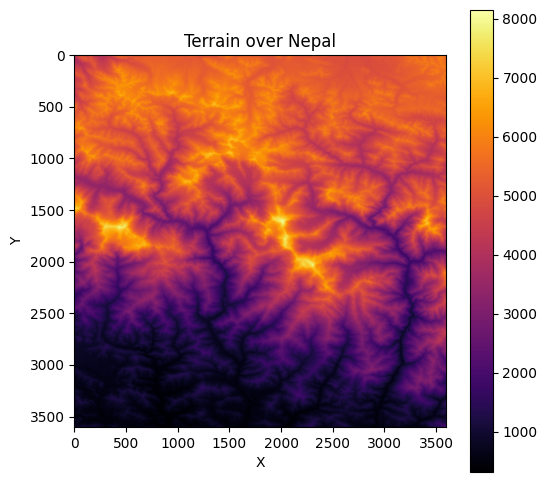

In [4]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colormaps
#['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral_r', 'Wistia_r', 'YlGn_r', 'YlGnBu_r', 'YlOrBr_r', 'YlOrRd_r', 'afmhot_r', 'autumn_r', 'binary_r', 'bone_r', 'brg_r', 'bwr_r', 'cool_r', 'coolwarm_r', 'copper_r', 'cubehelix_r', 'flag_r', 'gist_earth_r', 'gist_gray_r', 'gist_heat_r', 'gist_ncar_r', 'gist_rainbow_r', 'gist_stern_r', 'gist_yarg_r', 'gnuplot_r', 'gnuplot2_r', 'gray_r', 'hot_r', 'hsv_r', 'jet_r', 'nipy_spectral_r', 'ocean_r', 'pink_r', 'prism_r', 'rainbow_r', 'seismic_r', 'spring_r', 'summer_r', 'terrain_r', 'winter_r', 'Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']

# Load the terrain
terrain1 = imread('/Users/hishem/Documents/GitHub/FYS-STK4155/Project1/Datafiles/nepal_2.tif')
# Show the terrain
plt.figure(figsize=(6,6))
plt.title('Terrain over Nepal')
plt.imshow(terrain1, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

(181, 181)
(181, 181)
(181, 181)


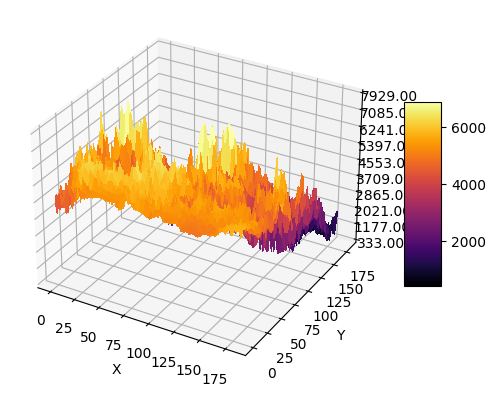

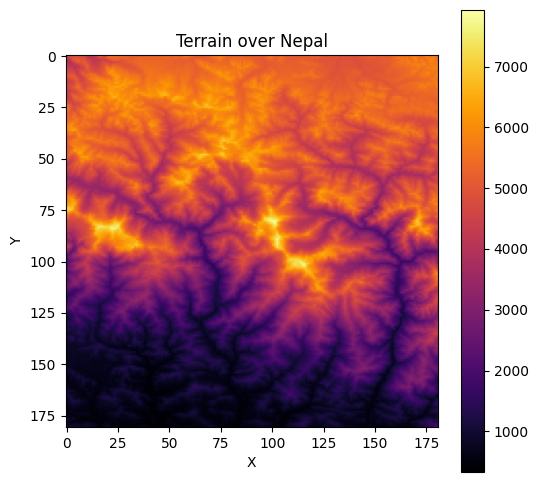

In [4]:

z = terrain1[::20, ::20] 


x = np.linspace(0, z.shape[0], int(z.shape[0]))
y = np.linspace(0, z.shape[1], int(z.shape[1]))
xm,ym = np.meshgrid(x,y)



print(xm.shape)
print(ym.shape)
print(z.shape)


fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# # Plot the surface.
surf = ax.plot_surface(xm, ym, z, cmap='inferno',
                       linewidth=0, antialiased=False)

# Customize the z axis.<
ax.set_zlim(np.min(z), np.max(z))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

plt.figure(figsize=(6,6))
plt.title('Terrain over Nepal')
plt.imshow(z, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()


181 181
Degree: 1, MSE: 772000.1652, R2: 0.7715
181 181
Degree: 2, MSE: 594109.8836, R2: 0.8241


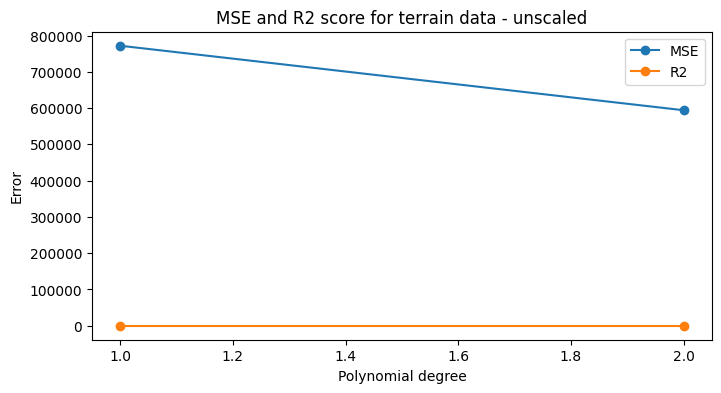

In [52]:
"""model terrain data without scaling, calculate mse and r2 score for different polynomial degrees and plot the surface"""
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# terrain1 = imread('/Users/hishem/Documents/GitHub/FYS-STK4155/Project1/Datafiles/nepal_2.tif')
# z = terrain1

x = np.linspace(0,1,z.shape[0])
y = np.linspace(0,1,z.shape[1])
xm,ym = np.meshgrid(x,y,indexing='ij')

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()

maxdegree = 2

mse = []
r2 = []

for d in range(1, maxdegree+1):
    X = create_design_matrix(x, y, d)

    X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)

    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train

    z_model = X @ beta

    mse.append(mean_squared_error(z_flat, z_model))
    r2.append(r2_score(z_flat, z_model))

    print(f"Degree: {d}, MSE: {mse[-1]:.4f}, R2: {r2[-1]:.4f}")




fig = plt.figure(figsize=(8, 4))
plt.plot(range(1, maxdegree+1), mse, '-o', label='MSE')
plt.plot(range(1, maxdegree+1), r2, '-o', label='R2')
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.title('MSE and R2 score for terrain data - unscaled')
plt.legend()

100%|██████████| 31/31 [00:37<00:00,  1.21s/it]


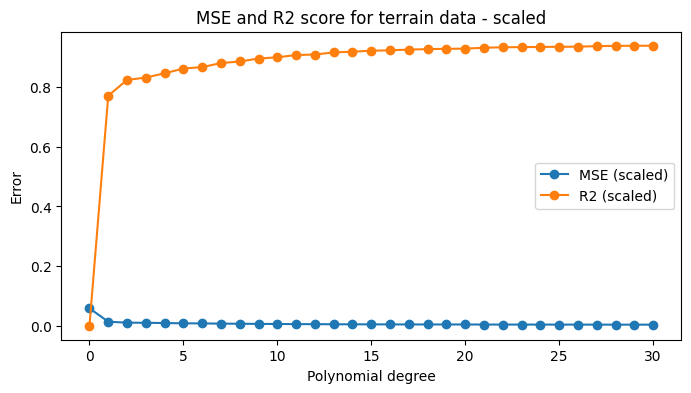

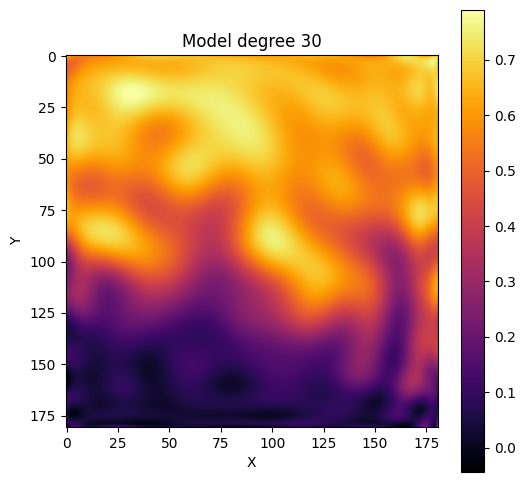

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score    
from sklearn.model_selection import train_test_split
from tqdm import trange
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import lstsq



# # Load terrain data
# terrain1 = imread('/Users/hishem/Documents/GitHub/FYS-STK4155/Project1/Datafiles/nepal_2.tif')
# z = terrain1

"""start with chopping out some data to make the calculations faster"""


z = terrain1[::20, ::20]


x = np.linspace(0, 1, z.shape[0])
y = np.linspace(0, 1, z.shape[1])


xm, ym = np.meshgrid(x, y, indexing='ij')


x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()

mindegree = 0
maxdegree = 31

mse_scaled = np.zeros(maxdegree-mindegree)
r2_scaled = np.zeros_like(mse_scaled)

lam_ridge = 1e-4
lam_lasso = 1e-5

models = []

i=0
# Iterate over polynomial degrees
for d in trange(mindegree, maxdegree):
    X = create_design_matrix(x, y, d)

    #scale MinMax
    X_scaled = X.copy()
    X_scaled[:,1:] = (X[:,1:] - np.min(X[:,1:], axis=0)) / (np.max(X[:,1:], axis=0) - np.min(X[:,1:], axis=0))

    z_scaled = (z_flat - np.min(z_flat)) / (np.max(z_flat) - np.min(z_flat))

    X_train, X_test, z_train, z_test = train_test_split(X_scaled, z_scaled, test_size=0.2, random_state=42)

    # OLS
    #beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    #slightly more stable than above
    beta, _, _, _ = lstsq(X_train, z_train, rcond=None)

    z_model = X @ beta
    mse_scaled[i] = mean_squared_error(z_scaled, z_model)
    r2_scaled[i] = r2_score(z_scaled, z_model)
   

    models.append(z_model)


    #print(f"Degree: {d}, MSE: {mse_scaled[i]:.4f}, R2: {r2_scaled[i]:.4f}")
    i+=1



# Plot results
fig = plt.figure(figsize=(8, 4))
plt.plot(range(mindegree, maxdegree), mse_scaled, '-o', label='MSE (scaled)')
plt.plot(range(mindegree, maxdegree), r2_scaled, '-o', label='R2 (scaled)')
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.title('MSE and R2 score for terrain data - scaled')
plt.legend()
plt.show()


plt.figure(figsize=(6,6))
plt.title(f'Model degree {d}')
plt.imshow(models[-1].reshape(z.shape), cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()



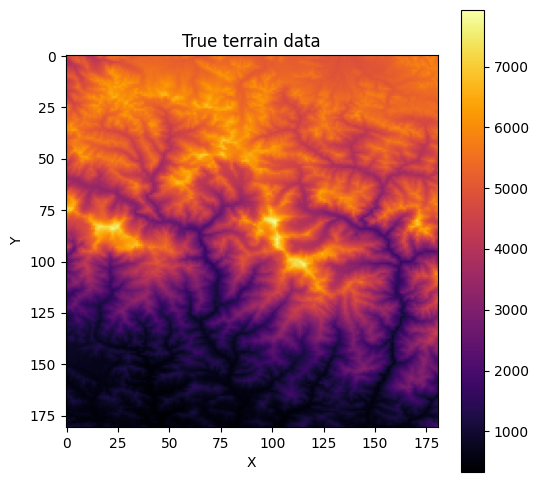

In [43]:
plt.figure(figsize=(6,6))
plt.title(f'True terrain data')
plt.imshow(z , cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [9]:
#Ridge and Lasso regression
from tqdm import trange

lam_ridge = 1e-4
lam_lasso = 1e-5

mindegree = 20
maxdegree = 31

mse_ridge = np.zeros(maxdegree-mindegree)
r2_ridge = np.zeros_like(mse_ridge)

mse_lasso = np.zeros_like(mse_ridge)
r2_lasso = np.zeros_like(mse_ridge)

models_ridge = []
models_lasso = []

i=0
# Iterate over polynomial degrees
for d in trange(mindegree,maxdegree):
    X = create_design_matrix(x, y, d)

    #scale MinMax
    X_scaled = X.copy()
    X_scaled[:,1:] = (X[:,1:] - np.min(X[:,1:], axis=0)) / (np.max(X[:,1:], axis=0) - np.min(X[:,1:], axis=0))

    z_scaled = (z_flat - np.min(z_flat)) / (np.max(z_flat) - np.min(z_flat))

    X_train, X_test, z_train, z_test = train_test_split(X_scaled, z_scaled, test_size=0.2, random_state=42)


    # Ridge
    ridge = Ridge(alpha=lam_ridge, fit_intercept=False)
    ridge.fit(X_train, z_train)
    z_model = ridge.predict(X)
    print('5')

    mse_ridge[i] = mean_squared_error(z_scaled, z_model)
    r2_ridge[i] = r2_score(z_scaled, z_model)

    models_ridge.append(z_model)
    print('6')
    # Lasso
    lasso = Lasso(alpha=lam_lasso, max_iter=int(1e5), tol=1e-4, fit_intercept=False)
    lasso.fit(X_train, z_train)
    z_model = lasso.predict(X)

    mse_lasso[i] = mean_squared_error(z_scaled, z_model)
    r2_lasso[i] = r2_score(z_scaled, z_model)

    models_lasso.append(z_model)

    print(f"Degree: {d}, MSE Ridge: {mse_ridge[i]:.4f}, R2 Ridge: {r2_ridge[i]:.4f}")
    print(f"Degree: {d}, MSE Lasso: {mse_lasso[i]:.4f}, R2 Lasso: {r2_lasso[i]:.4f}")

    i+=1


# Plot results
fig = plt.figure(figsize=(8, 4))
plt.plot(range(mindegree, maxdegree), mse_ridge, '-o', label='MSE Ridge')
plt.plot(range(mindegree, maxdegree), r2_ridge, '-o', label='R2 Ridge')
plt.plot(range(mindegree, maxdegree), mse_lasso, '-o', label='MSE Lasso')
plt.plot(range(mindegree, maxdegree), r2_lasso, '-o', label='R2 Lasso')
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.title('MSE and R2 score for terrain data - scaled')
plt.legend()
plt.show()



plt.subplot(1, 2, 1)
plt.imshow(models_ridge[-1].reshape(z.shape), cmap='inferno')
plt.title('Ridge')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(models_lasso[-1].reshape(z.shape), cmap='inferno')
plt.title('Lasso')
plt.colorbar()
plt.show()

  0%|          | 0/11 [00:00<?, ?it/s]

5
6


  9%|▉         | 1/11 [07:26<1:14:22, 446.29s/it]

Degree: 20, MSE Ridge: 0.0062, R2 Ridge: 0.8942
Degree: 20, MSE Lasso: 0.0078, R2 Lasso: 0.8673
5
6


 18%|█▊        | 2/11 [15:20<1:09:23, 462.59s/it]

Degree: 21, MSE Ridge: 0.0062, R2 Ridge: 0.8945
Degree: 21, MSE Lasso: 0.0077, R2 Lasso: 0.8676
5
6


 27%|██▋       | 3/11 [22:17<58:54, 441.80s/it]  

Degree: 22, MSE Ridge: 0.0062, R2 Ridge: 0.8949
Degree: 22, MSE Lasso: 0.0077, R2 Lasso: 0.8680
5
6


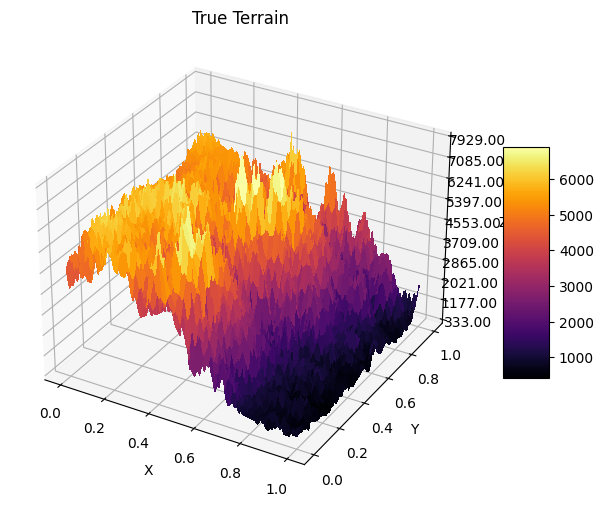

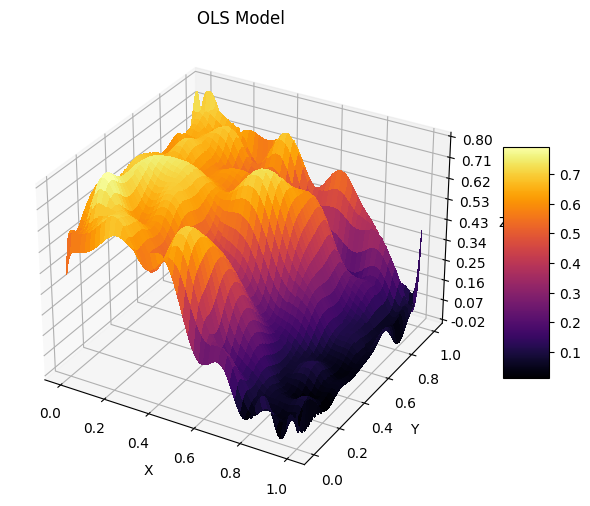

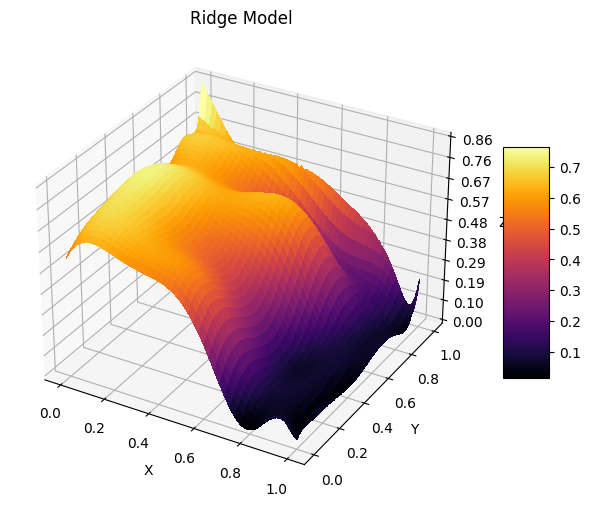

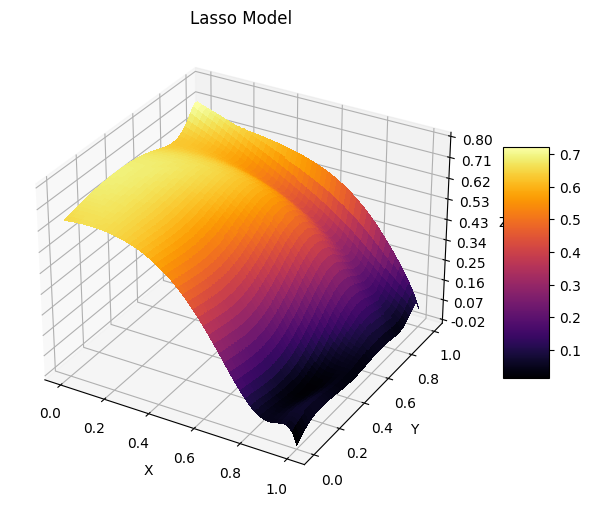

In [56]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

z_model_ridge = models_ridge[-1].reshape(z.shape)
z_model_lasso = models_lasso[-1].reshape(z.shape)
z_model_ols = models[-1].reshape(z.shape)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection = '3d')
# # Plot the surface.
surf = ax.plot_surface(xm, ym, z, cmap='inferno',
                       linewidth=0, antialiased=False)

# Customize the z axis.<
ax.set_zlim(np.min(z), np.max(z))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('True Terrain')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(xm, ym, z_model_ols, cmap='inferno', linewidth=0, antialiased=False)
ax.set_zlim(np.min(z_model_ols), np.max(z_model_ols)) 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('OLS Model')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(xm, ym, z_model_ridge, cmap='inferno', linewidth=0, antialiased=False)
ax.set_zlim(np.min(z_model_ridge), np.max(z_model_ridge))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ridge Model')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(xm, ym, z_model_lasso, cmap='inferno', linewidth=0, antialiased=False)
ax.set_zlim(np.min(z_model_ols), np.max(z_model_ols)) 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lasso Model')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [60]:
#bias variance tradeoff for terrain data, OLS, Ridge and Lasso
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Number of bootstrap samples and max polynomial degree
n_boostraps = 200
maxdegree = 10
# batch_size = 150

lam_ridge = 1e-4
lam_lasso = 1e-5


errors = np.zeros((maxdegree, 3))
biases = np.zeros((maxdegree, 3))
variances = np.zeros((maxdegree, 3))

z = FrankeFunction(xm, ym, noisefactor=0.1)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()


x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2)
X_train = np.c_[x_train, y_train]
X_test = np.c_[x_test, y_test]

for degree in range(maxdegree):
    z_pred = np.empty((z_test.shape[0], n_boostraps, 3))


    Model_ols = LinearRegression(fit_intercept=False)
    Model_ridge = Ridge(alpha=lam_ridge)
    Model_lasso = Lasso(alpha=lam_lasso)

    poly = PolynomialFeatures(degree=degree)

    mse = np.zeros((n_boostraps, 3)) 

    for i in range(n_boostraps):
        X_, z_ = resample(X_train, z_train)
        # indices = np.random.choice(len(X_train), size=batch_size, replace=True)
        # X_batch = X_[indices]
        # z_batch = z_[indices]

        #OLS
        z_pred[:, i, 0] = Model_ols.fit(poly.fit_transform(X_), z_).predict(poly.fit_transform(X_test))
        mse[i, 0] = mean_squared_error(z_test, z_pred[:, i, 0])
        #Ridge
        z_pred[:, i, 1] = Model_ridge.fit(poly.fit_transform(X_), z_).predict(poly.fit_transform(X_test))
        mse[i, 1] = mean_squared_error(z_test, z_pred[:, i, 1])
        #Lasso
        z_pred[:, i, 2] = Model_lasso.fit(poly.fit_transform(X_), z_).predict(poly.fit_transform(X_test))
        mse[i, 2] = mean_squared_error(z_test, z_pred[:, i, 2])
    
    errors[degree] = np.mean(mse, axis=0)
    print(errors[degree])   
    z_pred_mean = np.mean(z_pred, axis=1)
    biases[degree] = [np.mean((z_test - np.mean(z_pred[:, :, j], axis=1)) ** 2) for j in range(3)]
    variances[degree] = np.mean(np.var(z_pred, axis=1), axis=0)

    print(f'Degree: {degree}, OLS Error: {errors[degree,0]:.4f}, Bias^2: {biases[degree,0]:.4f}, Variance: {variances[degree,0]:.4f}')
    print(f'         Ridge Error: {errors[degree,1]:.4f}, Bias^2: {biases[degree,1]:.4f}, Variance: {variances[degree,1]:.4f}')
    print(f'         Lasso Error: {errors[degree,2]:.4f}, Bias^2: {biases[degree,2]:.4f}, Variance: {variances[degree,2]:.4f}')



for i in range(3):
    plt.figure()
    plt.plot(range(maxdegree), biases[:,i], '-o', label='Bias')
    plt.plot(range(maxdegree), errors[:,i], '-o', label='Error')
    plt.plot(range(maxdegree), variances[:,i], '-o', label='Variance')
    plt.legend()
    plt.xlabel('Model Complexity')
    plt.ylabel('Error')
    if i == 0:
        plt.title('Bias-Variance Tradeoff for OLS')
    elif i == 1:
        plt.title('Bias-Variance Tradeoff for Ridge')
    elif i == 2:
        plt.title('Bias-Variance Tradeoff for Lasso')
    plt.show() 


bootstrap_mse_ols = np.min(errors[:,0])
bootstrap_mse_ridge = np.min(errors[:,1])
bootstrap_mse_lasso = np.min(errors[:,2])


[0.09177942 0.09177942 0.09177942]
Degree: 0, OLS Error: 0.0918, Bias^2: 0.0918, Variance: 0.0000
         Ridge Error: 0.0918, Bias^2: 0.0918, Variance: 0.0000
         Lasso Error: 0.0918, Bias^2: 0.0918, Variance: 0.0000
[0.03255229 0.03255229 0.03255204]
Degree: 1, OLS Error: 0.0326, Bias^2: 0.0325, Variance: 0.0000
         Ridge Error: 0.0326, Bias^2: 0.0325, Variance: 0.0000
         Lasso Error: 0.0326, Bias^2: 0.0325, Variance: 0.0000
[0.02657823 0.02657823 0.02657755]
Degree: 2, OLS Error: 0.0266, Bias^2: 0.0266, Variance: 0.0000
         Ridge Error: 0.0266, Bias^2: 0.0266, Variance: 0.0000
         Lasso Error: 0.0266, Bias^2: 0.0266, Variance: 0.0000


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.744e+02, tolerance: 2.467e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+02, tolerance: 2.437e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[0.01733683 0.01733683 0.01742491]
Degree: 3, OLS Error: 0.0173, Bias^2: 0.0173, Variance: 0.0000
         Ridge Error: 0.0173, Bias^2: 0.0173, Variance: 0.0000
         Lasso Error: 0.0174, Bias^2: 0.0174, Variance: 0.0000


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+02, tolerance: 2.466e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.790e+02, tolerance: 2.429e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[0.01382465 0.01382434 0.01748372]
Degree: 4, OLS Error: 0.0138, Bias^2: 0.0138, Variance: 0.0000
         Ridge Error: 0.0138, Bias^2: 0.0138, Variance: 0.0000
         Lasso Error: 0.0175, Bias^2: 0.0175, Variance: 0.0000


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+02, tolerance: 2.414e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+02, tolerance: 2.453e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[0.01196973 0.01197304 0.01694356]
Degree: 5, OLS Error: 0.0120, Bias^2: 0.0120, Variance: 0.0000
         Ridge Error: 0.0120, Bias^2: 0.0120, Variance: 0.0000
         Lasso Error: 0.0169, Bias^2: 0.0169, Variance: 0.0000


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+02, tolerance: 2.432e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.019e+02, tolerance: 2.446e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

[0.01128786 0.01132901 0.01611307]
Degree: 6, OLS Error: 0.0113, Bias^2: 0.0113, Variance: 0.0000
         Ridge Error: 0.0113, Bias^2: 0.0113, Variance: 0.0000
         Lasso Error: 0.0161, Bias^2: 0.0161, Variance: 0.0000


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+02, tolerance: 2.433e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+02, tolerance: 2.434e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

KeyboardInterrupt: 